In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import torch
import torchvision
from torchvision.datasets import ImageFolder
import torch.nn.functional as F
from torchvision import transforms
import matplotlib.pyplot as plt
import torchvision.models as models
import torch.nn as nn
from torch.utils.data.sampler import SubsetRandomSampler

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [0]:
train_dir = 'drive/My Drive/flower-photos/flower_photos/train'
test_dir = 'drive/My Drive/flower-photos/flower_photos/test'
batch = 200

transform = transforms.Compose([transforms.RandomResizedCrop(224),transforms.ToTensor()])
train_data = ImageFolder(train_dir, transform=transform)
test_data = ImageFolder(test_dir, transform=transform)
true_labels=['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [6]:
len(test_data)

540

In [0]:
train_size = len(train_data)
data_idx = list(range(len(train_data)))
valid_size = int(np.floor(0.2*train_size))
train_idx = data_idx[valid_size:]
valid_idx = data_idx[:valid_size]
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

In [0]:
train_loader = torch.utils.data.DataLoader(train_data,batch_size=200, shuffle = False, sampler = train_sampler)
valid_loader = torch.utils.data.DataLoader(train_data,batch_size=200, shuffle = False, sampler = valid_sampler)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=200, shuffle = True)

In [9]:
len(valid_loader.sampler)

626

torch.Size([3, 224, 224])
(224, 224, 3)


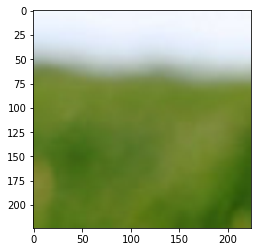

In [10]:
img,label = next(iter(train_loader))
print(img[0,:,:,:].shape)
img = np.transpose(img[0,:,:,:].numpy(),(1,2,0))
print(img.shape)
plt.imshow(img)

torch.Size([3, 224, 224])
(224, 224, 3)


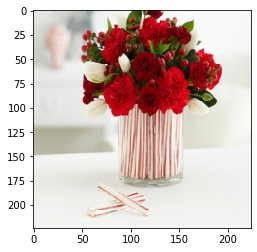

In [11]:
img,label = next(iter(test_loader))
print(img[0,:,:,:].shape)
img = np.transpose(img[0,:,:,:].numpy(),(1,2,0))
print(img.shape)
plt.imshow(img)

In [12]:
model= models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 251MB/s]


In [13]:

model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [14]:
type(model.classifier)

torch.nn.modules.container.Sequential

In [15]:
for i in model.features[0].parameters():
  print(i)

Parameter containing:
tensor([[[[-5.5373e-01,  1.4270e-01,  5.2896e-01],
          [-5.8312e-01,  3.5655e-01,  7.6566e-01],
          [-6.9022e-01, -4.8019e-02,  4.8409e-01]],

         [[ 1.7548e-01,  9.8630e-03, -8.1413e-02],
          [ 4.4089e-02, -7.0323e-02, -2.6035e-01],
          [ 1.3239e-01, -1.7279e-01, -1.3226e-01]],

         [[ 3.1303e-01, -1.6591e-01, -4.2752e-01],
          [ 4.7519e-01, -8.2677e-02, -4.8700e-01],
          [ 6.3203e-01,  1.9308e-02, -2.7753e-01]]],


        [[[ 2.3254e-01,  1.2666e-01,  1.8605e-01],
          [-4.2805e-01, -2.4349e-01,  2.4628e-01],
          [-2.5066e-01,  1.4177e-01, -5.4864e-03]],

         [[-1.4076e-01, -2.1903e-01,  1.5041e-01],
          [-8.4127e-01, -3.5176e-01,  5.6398e-01],
          [-2.4194e-01,  5.1928e-01,  5.3915e-01]],

         [[-3.1432e-01, -3.7048e-01, -1.3094e-01],
          [-4.7144e-01, -1.5503e-01,  3.4589e-01],
          [ 5.4384e-02,  5.8683e-01,  4.9580e-01]]],


        [[[ 1.7715e-01,  5.2149e-01,  9.8740

In [0]:
for param in model.features.parameters():
  param.requires_grad = False

In [17]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [0]:
fc = nn.Sequential(nn.Linear(25088,4096),nn.ReLU(), nn.Linear(4096,2048), nn.ReLU(), nn.Linear(2048,1024), nn.ReLU(), nn.Linear(1024,5))
model.classifier = fc

In [19]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:
model = model.to(device)

In [0]:
import torch.optim 
optimizer =torch.optim.Adam(model.classifier.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

In [22]:
len(valid_loader.sampler)/20

31.3

In [23]:
len(valid_sampler)

626

In [24]:
model.state_dict

<bound method Module.state_dict of VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size

In [26]:
epoch = 20
min_valid_accuracy = 0


for e in range(epoch):
  correct_pred_t = 0 
  running_loss_t = 0
  running_loss_v = 0
  correct_pred_v = 0
  for data, label in train_loader:
    data, label = data.to(device), label.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss=criterion(output,label)
    running_loss_t+=loss.item()*data.shape[0]
    p = F.softmax(output, dim = 1)
    _ , c = torch.max(p,1)
    correct_pred_t += torch.sum(c == label).item()
    loss.backward()
    optimizer.step()
   

  print("Epoch: {}  Training Loss: {}  Training Accuracy:{}".format(e, running_loss_t/len(train_sampler), correct_pred_t/len(train_sampler) ))
  print()
  for data_v, label_v in valid_loader:
    
    
    data_v, label_v = data_v.to(device), label_v.to(device)
    output_v = model(data_v)
    loss_v=criterion(output_v,label_v)
    running_loss_v+=loss_v.item()*data_v.shape[0]
    p_v = F.softmax(output_v, dim = 1)
    _ , c_v = torch.max(p_v,1)
    correct_pred_v += torch.sum(c_v == label_v).item()
    
    
  print("Epoch: {}  Validation Loss: {}  Validation Accuracy:{}".format(e, running_loss_v/len(valid_sampler), correct_pred_v/len(valid_sampler) ))

  if (correct_pred_v/len(valid_sampler) > min_valid_accuracy):
    print('New Min Validation Accuracy:', correct_pred_v/len(valid_sampler))
    min_valid_accuracy = correct_pred_v/len(valid_sampler)
    print('Saving the Checkpoint: ')
    torch.save(model.state_dict(),'checkpoint.pt')

  print('*'*60)


Epoch: 0  Training Loss: 2.0358645267570363  Training Accuracy:0.5031948881789138

Epoch: 0  Validation Loss: 16.011690474927615  Validation Accuracy:0.11661341853035144
New Min Validation Accuracy: 0.11661341853035144
Saving the Checkpoint: 
************************************************************
Epoch: 1  Training Loss: 0.4746682376335985  Training Accuracy:0.8238817891373802

Epoch: 1  Validation Loss: 13.2437131930464  Validation Accuracy:0.11661341853035144
************************************************************
Epoch: 2  Training Loss: 0.34684189087666645  Training Accuracy:0.8690095846645367

Epoch: 2  Validation Loss: 14.992304616081068  Validation Accuracy:0.11661341853035144
************************************************************
Epoch: 3  Training Loss: 0.30959974653042927  Training Accuracy:0.8913738019169329

Epoch: 3  Validation Loss: 15.653154757076178  Validation Accuracy:0.1182108626198083
New Min Validation Accuracy: 0.1182108626198083
Saving the Checkp

In [28]:
model.load_state_dict(torch.load('checkpoint.pt'))

model.eval()
running_loss = 0
correct_pred = 0
with torch.no_grad():
  for data, label in test_loader:
    data, label = data.to(device), label.to(device)
    output = model(data)
    p = F.softmax(output, 1)
    loss = criterion(output, label)
    running_loss+=loss.item()*data.shape[0]
    _, pred_class= torch.max(p,1)
    print(label)
    print(pred_class)
    correct_pred += torch.sum(pred_class == label).item()

  print("Test Loss: ", running_loss/len(test_loader.sampler))
  print('Test Accuracy:',correct_pred/len(test_loader.sampler))

tensor([3, 1, 4, 3, 1, 4, 4, 1, 2, 4, 2, 0, 4, 4, 4, 1, 3, 1, 3, 4, 1, 2, 4, 1,
        3, 1, 0, 1, 4, 2, 3, 2, 1, 2, 1, 1, 3, 1, 2, 4, 3, 3, 4, 0, 2, 1, 3, 3,
        1, 3, 4, 1, 4, 4, 4, 1, 1, 4, 1, 4, 0, 2, 3, 2, 3, 2, 1, 3, 3, 2, 1, 1,
        3, 3, 1, 4, 1, 3, 3, 1, 0, 4, 1, 1, 2, 1, 4, 1, 2, 4, 1, 0, 3, 4, 1, 1,
        4, 1, 3, 1, 3, 4, 0, 2, 0, 1, 3, 1, 4, 3, 4, 1, 2, 4, 1, 2, 2, 0, 4, 0,
        0, 3, 0, 4, 1, 1, 4, 2, 2, 3, 1, 3, 1, 3, 3, 3, 2, 0, 0, 1, 3, 4, 3, 1,
        4, 0, 4, 3, 2, 3, 1, 4, 4, 3, 2, 1, 2, 4, 0, 0, 3, 3, 0, 0, 1, 1, 0, 1,
        3, 2, 2, 4, 4, 0, 3, 1, 0, 2, 2, 4, 4, 4, 3, 4, 2, 1, 0, 0, 0, 2, 2, 2,
        2, 0, 4, 0, 3, 2, 2, 4], device='cuda:0')
tensor([3, 1, 4, 3, 1, 4, 1, 1, 4, 4, 2, 1, 2, 4, 2, 1, 3, 1, 3, 4, 1, 2, 4, 1,
        3, 1, 1, 1, 4, 3, 3, 3, 1, 2, 1, 1, 3, 1, 2, 4, 3, 3, 4, 4, 4, 1, 3, 3,
        1, 3, 2, 1, 3, 4, 4, 1, 1, 4, 1, 4, 1, 2, 1, 4, 3, 1, 1, 3, 3, 2, 1, 1,
        3, 3, 1, 4, 1, 3, 3, 1, 3, 4, 1, 1, 2, 1, 4, 1, 2, 4, 1, 1, 3,